<a href="https://colab.research.google.com/github/methoder00/NLP/blob/master/ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML : Classification example

1. Dataset import from Kaggle
2. EDA / Data-analysis
3. Visualization
4. Train&Test
5. Train-analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset import from kaggle

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'parkseonwoo95'
os.environ['KAGGLE_KEY'] = '16e4cfdb9dead4068f00aa6d41def7a8'

In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d bobbyscience/league-of-legends-diamond-ranked-games-10-min
!unzip '*.zip'

  0% 0.00/539k [00:00<?, ?B/s]
100% 539k/539k [00:00<00:00, 74.2MB/s]
Archive:  xAPI-Edu-Data.zip
replace xAPI-Edu-Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

Archive:  league-of-legends-diamond-ranked-games-10-min.zip
  inflating: high_diamond_ranked_10min.csv  

2 archives were successfully processed.


In [ ]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

# 2. EDA (Exploratory Data Analysis) / Data-ananlyis

In [ ]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


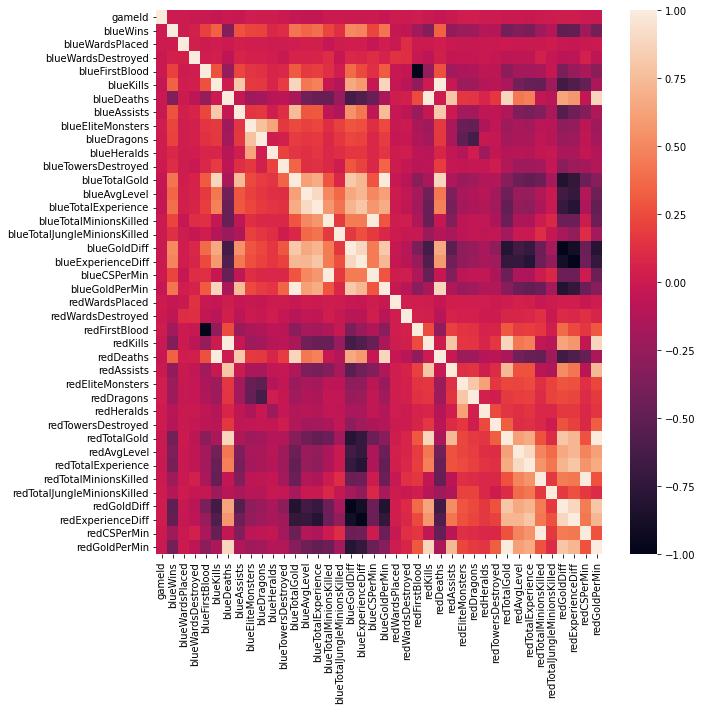

In [ ]:
#Pearson's Correlation
fig = plt.figure(figsize=(10,10))   # plt.figure : Graph Instance 
sns.heatmap(df.corr())              # .corr() : correlation matrix of dataframe


1600


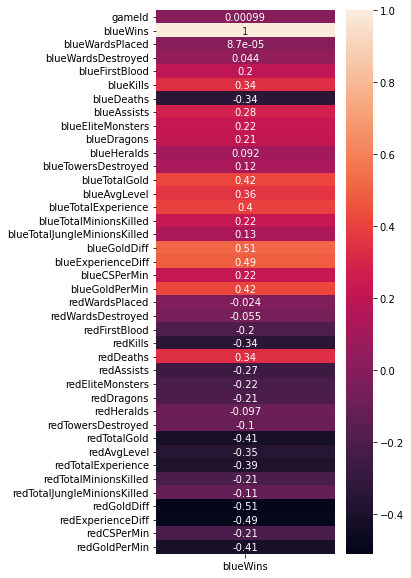

In [ ]:
fig = plt.figure(figsize=(4,10))
sns.heatmap(df.corr()[['blueWins']],annot=True) #annot : 수치 표현
                                                #a.corr()[['label']] : row vector export

In [ ]:
#correlation matrix
df.corr()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,...,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871


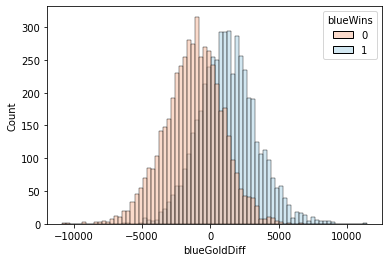

In [ ]:
sns.histplot(data=df, x='blueGoldDiff', hue='blueWins', palette='RdBu')
#seaborn (data setting : data=df, data classifcation : hue='blueWins')

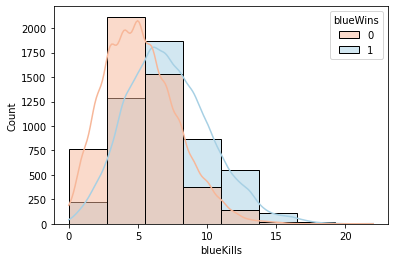

In [ ]:
sns.histplot(data=df, x='blueKills', hue='blueWins', palette='RdBu', kde=True, bins=8)

# Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.drop(['gameId', 
       'redFirstBlood', 'redKills', 'redDeaths',
       'redTotalGold', 'redTotalExperience',
       'redGoldDiff',
       'redExperienceDiff'], axis=1, inplace=True)
# Exclude useless(multicollinearity) columns
# Inplace=True : void type
# if not true > return type

In [ ]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [ ]:
X_num = df[[ 'blueWardsPlaced', 'blueWardsDestroyed', 
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin']]
X_cat = df[['blueDragons','blueHeralds','redDragons','redHeralds']]
#X_num : 수치형 데이터 / X_cat : 논리형 데이터(0, 1) 분리
scaler = StandardScaler()           #Scaler 호출
scaler.fit(X_num)                   #X_num data의 통계적 info. 추출
X_scaled = scaler.transform(X_num)  #해당 info 통해서 normalization
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
# scaling 할 경우 tensor화 되니, 다시 dataframe화
# X_scaled : 대상, index와 column은 이전 X_num의 것 그대로 사용
X = pd.concat([X_scaled, X_cat], axis=1)
# 다시 수치형 데이터와 논리형 데이터 병합
y = df['blueWins']
# train_target : blueWins

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Model Traning / Test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

pred1 = model_lr.predict(X_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

pred2 = model_xgb.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



In [ ]:
model_lr.coef_.shape

(1, 30)

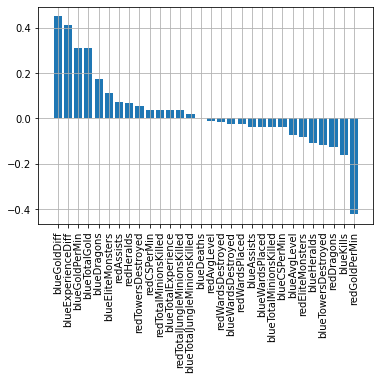

In [ ]:
model_coef = pd.DataFrame(data=model_lr.coef_[0], index=X.columns, columns=['Model Coefficient'])
# coef 2차 list 되어 있는 것 풀어서 다시 DataFrame화
model_coef.sort_values(by='Model Coefficient', ascending=False, inplace=True)
plt.bar(model_coef.index, model_coef['Model Coefficient'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

<BarContainer object of 30 artists>

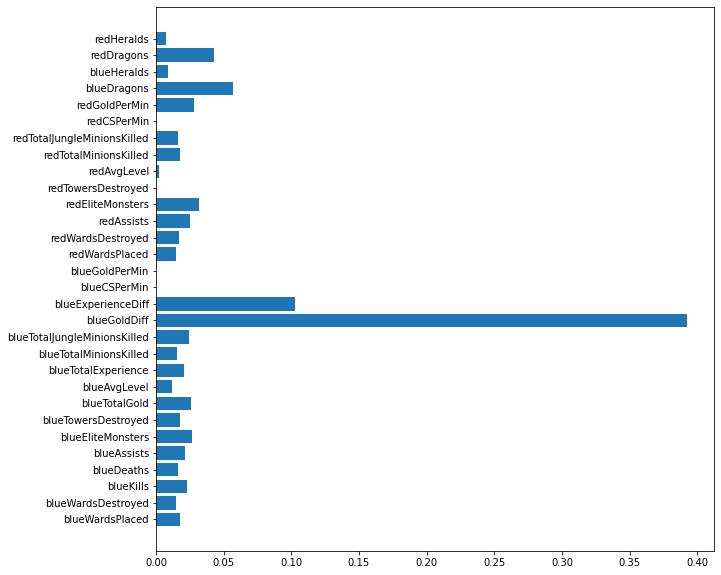

In [ ]:
fig = plt.figure(figsize= (10,10))
plt.barh(X.columns, model_xgb.feature_importances_)